# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

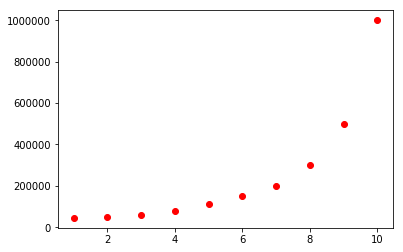

In [3]:
plt.scatter(X, y, color = 'red')
plt.show()

In [4]:
X.shape

(10, 1)

In [5]:
y.shape

(10,)

In [6]:
y = y.reshape(len(y),1)

In [7]:
type(y)

numpy.ndarray

## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Vi vill göra skalning både på X och y. Instantiera därför två
# separata objekt av StandardScalat, t.ex sc_X och sc_y
# Vi har bara EN kolumn i X och EN i y
# Skala om X och y
# Visa dem i en plot

In [9]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [10]:
X = sc_X.fit_transform(X)

In [11]:
y = sc_y.fit_transform(y)

In [12]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [ ]:
# Dessa nya X och y ska användas i klassen SVR, som vi instantierar som en regressor
# Ni måste Googla i Scikit-learn på SVR hur man importerar den
# Ni ska också kolla i dokumentationen vilka parametrar
# som kan sättas.
# Vi ska använda "kernel = 'rbf'"

In [13]:
from sklearn.svm import SVR

In [14]:
regressor = SVR(kernel = 'rbf')

In [15]:
regressor.fit(X,y)

c:\users\beholm\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Predicting a new result

In [ ]:
# Hur ska vi använda regressor.predict för att modellera 
# lön om erfarenheten är 6.5 ?

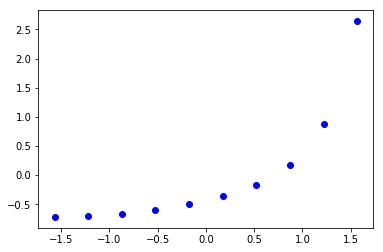

In [16]:
plt.scatter(X, y, color = 'blue')
plt.show()

In [17]:
sc_X.transform([[6.5]])

array([[0.34815531]])

In [18]:
regressor.predict(sc_X.transform([[6.5]]))

array([-0.27861589])

In [19]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

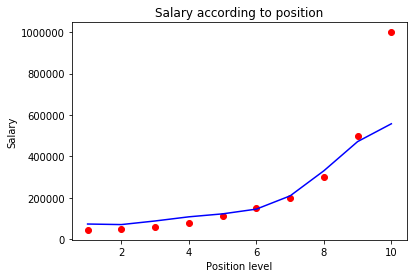

In [20]:
# Ska plotta X värden mot predicerade y värden,
# samt lägga in ursprunglig data som punkter.
# Kom ihåg att både X och y variablerna redan 
# är transformerade! Vi måste transformera
# tillbaka bägge!

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)),color='blue')
plt.title('Salary according to position')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

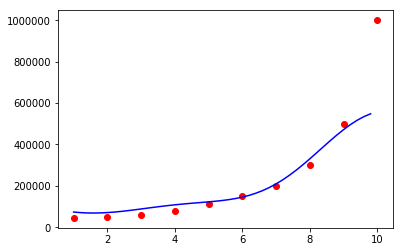

In [21]:
# Vill göra plotten mjukare genom att öka upplösningen.
# Skapaer ett ny 'rutnät' (grid) på X axeln, som delar
# in intervallet i punkter med avståndet 0.1
# Räknar sedan ut vad modellen predicerar för dessa
# punter, och använter plot funktionen för att
# skriva ut punkterna i en graf och förbinda 
# med linjer

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)),0.2)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid,sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))),color='blue')